# Welcome to the Jupyter interactive notebook!

### Author: Adrian Gustafson
[adrian.gustafson@nateko.lu.se](mailto:"adrian.gustafson@nateko.lu.se")

[Department of Physical Geography and Ecosystem Science](https://www.nateko.lu.se)<br>
[Centre for Environmental and Climate Research](https://www.cec.lu.se)

Here you can follow my work through the analysis of model simulations from the dynamic ecosystem model LPJ-GUESS for Harvard forest.

**Instructions:**
- To execute a cell press the keys `SHIFT` + `ENTER`
- You can execute one cell at a time, or the whole script by selecting Cell > Run cells in the panel above
- If a cell does not work, it may be due to alterations in the DataFrame that is being displayed. Try to rerun the cell where the DataFrame is loaded and rerun subsequent cells.

**Try to execute the cell below, make a change and rerun the cell!**


In [25]:
a = 1 + 1
b = 3 * 7

'a = {} and b = {}, seems like this works! Good job!'.format(a, b)

'a = 2 and b = 21, seems like this works! Good job!'

## Comments
* **Another title would be suitable**
Yes, probably. However, I made this notebook with a target group of people who have never used Jupyter, Python or programming at all, in mind. It is also a work in progress, so it is just a way to present some of my work to collegues on the same paper.


* **The introductory instructions are probably necessary**
In a way, but I designed this notebook with people who explicitly express worries or doubts towards using this type of communication (but who have never seen it).


* **Notebook could have a link to mybinder or similar for easier access**
Good point, this is not included in this notebook, but has been done in a subsequent version of the notebook.


## Background
During soil organic matter (SOM) decomposition in Earth system models (ESMs) and dynamic vegetation models (DVMs), OM is exchanged between SOM pools according to first-order decay kinetics, which is represented by a maximum decay rate constant for each pool ($k_{max}$) and rate modifiers for soil characteristics or conditions, where soil temperature ($f(T)$) and moisture ($f(θ)$) rate modifiers are the most commonly used.

<center>${\frac{dC_j}{dt}} = -k_{j, max}f(\Theta)f(T)C_j$  [1]</center>

Decayed OM is transfered to another pool, but a fraction of this is lost as $CO_2$ to the atmosphere. The fraction of the mineralised carnon that microbes assimilate into their biomass is termed the carbon use efficiency, CUE.

<center>$CUE = {\frac {growth}{growth + respiration}}$   [2] </center>

In most ESMs and DVMs this fraction is set, commonly to about 55-60% depending on the SOM pool. In this study we incorporate impirical functions for temperature dependent growth and respiration. This means that the CUE is calculated dynamically within the model instead of being set statically. Fig 1 shows the rate modifiers, the difference between the two curves of a respiration-growth pair could be interpreted as the CUE. The new decomposition rate also adapt to the long term climate, which is represented by the mean yearly three hottest months over the last five years ($T_{m3hm}$).

<center>
    $f_{T, growth}(T_s) = \left(0.02834(T_s-T_{min, growth})(1-e^{0.1(T_s-T_{max, growth})})\right)^2$     [3]<br>
    <br>
    $f_{T, resp}(T_s) = (0.03278(T_s-T_{min,resp}))^2$       [4] <br>
    <br>
    $T_{min,growth} = 0.2804T_{m3hm}-13.818$         [5]<br>
    <br>
    $T_{max,growth} = T_{min,growth} - \Delta T$         [6]<br>
    <br>
    $T_{min,resp} = 0.207T_{m3hm} - 7.804$
</center>

<figure>
    <img src="plots/rate_modifiers.png") />
    <figcaption>
        *Fig 1.* The original (black) and new growth and respiration rate modifiers.
    </figcaption>
</figure>


## Model simulations

For this experiment we incorporated the above modfications of the temperature rate modifier to the process-based dynamic global vegetation modell *LPJ-GUESS* (Smith et al., 2014). The model simulates terrestrial biosphere processes at a daily time resolution on a regional to global scale. It needs climate data at a daily time resolution, atmospheric $CO_2$ concentration and nitrogen deposition. LPJ-GUESS may also take in information about land-use and management. 

The vegetation in the model is represented by Plant Function Types (PFT). Individuals of each PFT competes with others for light, water and nutrients(N). For this study we used the Temperate Broadleafed Summergreen trees (TeBS), Temperate shade-Intolerant Summergreen trees (IBS) and $C_3$-grasses (C3G).
#### Forcing data
Six model simulations were conducted for Harvard forest (Lat: 42.25N, Lon: 75.25E). Three runs were made with both versions of the model, unmodified **(Trunk)** and modified **(Flex)**. These three runs were all driven with climate data from the climate dataset CRU-NCEP. Soil temperatures were however different between the model runs. Firstly, the model calculated the soil temperatures internally, herafter referred to as 'Modelled'. Secondly the model was forced with soil temperatures from measurement plots('Control'), measured by Contosta et al., 2011. Lastly, some of the plots in the same experiment were heated to have a soil temperature +5°C above ambient soil temperatures ('Heated').

Fig 2 shows the distribution of soil temperatures from the model vs. the measured soil temperatures in the plots. Fig 3. shows the seasonal pattern of the forcing soil temperature data from the measurement plots.

<figure>
    <img src="plots/SoilT_obs_vs_mod.png" />
    <figcaption>
        Fig 2. The internal LPJ-GUESS soil temperature vs. measured daily mean soil temperature from Contosta et al. 2012.
    </figcaption>
</figure>

<figure>
    <img src="plots/daily_soilemp_2006-2015_gapfilled.png" />
    <figcaption>
        Fig 3. Daily soiltemperatures from control and heated plots between July 2006 and December 2015. Black lines indicates areas where the data has been gapfilled.
    </figcaption>
</figure>

#### Evaluation data
The evaluation data are from the same plots used by Contosta et al., 2011. The data was aggregated from a hourly timestep to a daily and a mean was made of all the plots in the experiment. Only data from the soil O-horizon as this completely dominates soil organic carbon turnover. Data for both microbial respiration and growth was obtained. 

## Comments
* **Better description of where the measurement data comes from and how the empirical functions were derived**
Yes, I would like that as well :)


* **Figure numbers should be referenced in the text so that it is easier to move back and forth between the figures and text**
Good point! I did not think of that...

## Analysis
Below is described the analysis conducted after the simulation.

First we need to read in the data that we will process.

In [89]:
# Import the necessary packages for this analysis
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from scipy import stats

from datetime import datetime, timedelta

# Set plot style
plt.rcParams.update({'xtick.major.size':4,'ytick.major.size':4,
                    'xtick.direction':'out','ytick.direction':'out',
                    'xtick.labelsize':12,'ytick.labelsize':12,
                    'xtick.major.pad':5,'ytick.major.pad':5,
                    'axes.linewidth':1.1,'axes.labelsize':14,
                    'font.size': 14, 'scatter.marker': 'o',
                    'figure.facecolor': 'w', 'legend.fontsize': 12,
                    'figure.figsize': [16, 8]})

# Read in the necessary files
# Daily model values for soil respiration, growth, temperature and water content
dsoil_trunk      = pd.read_csv('data/Model/dsoil_trunk.out', delim_whitespace=True)
dsoil_trunk_ctrl = pd.read_csv('data/Model/dsoil_trunk_ctrl.out', delim_whitespace=True)
dsoil_trunk_htd  = pd.read_csv('data/Model/dsoil_trunk_htd.out', delim_whitespace=True)

dsoil_flex       = pd.read_csv('data/Model/dsoil_flex.out', delim_whitespace=True)
dsoil_flex_ctrl  = pd.read_csv('data/Model/dsoil_flex_ctrl.out', delim_whitespace=True)
dsoil_flex_htd   = pd.read_csv('data/Model/dsoil_flex_htd.out', delim_whitespace=True)

# Yearly modelled C pools
cpool_trunk      = pd.read_csv('data/Model/cpool_trunk.out', delim_whitespace=True)
cpool_trunk_ctrl  = pd.read_csv('data/Model/cpool_trunk_ctrl.out', delim_whitespace=True)
cpool_trunk_htd  = pd.read_csv('data/Model/cpool_trunk_htd.out', delim_whitespace=True)

cpool_flex       = pd.read_csv('data/Model/cpool_flex.out', delim_whitespace=True)
cpool_flex_ctrl  = pd.read_csv('data/Model/cpool_flex_ctrl.out', delim_whitespace=True)
cpool_flex_htd   = pd.read_csv('data/Model/cpool_flex_htd.out', delim_whitespace=True)

# Print first five rows of an example DataFrame
dsoil_flex.head()

,Lon,Lat,Year,Day,WcontU,WcontL,SoilT,Resp,Growth
0,-72.25,42.25,2000,0,0.7575,0.6637,-0.138,0.00012,0.00031
1,-72.25,42.25,2000,1,0.7575,0.6637,-0.463,0.00009,0.00028
2,-72.25,42.25,2000,2,0.7575,0.6637,-0.774,0.00008,0.00026
3,-72.25,42.25,2000,3,0.7575,0.6637,-1.071,0.00006,0.00024
4,-72.25,42.25,2000,4,0.7575,0.6637,-1.355,0.00005,0.00022


### Data cleaning
After reading in the relevant data, we need to clean it. Mostly what we will do is convert both the modelled and observed data to have Date as an index instdead of Year, Month and Day. This will also make it easier later to merge dataframes.

In [90]:
def clean_modelled_data(df):
    def create_datetimes(row):
        # Convert the year and day of year in each row to datetime format (YYYY-MM-DD)
        d = pd.Series({'Date': pd.to_datetime(datetime(year=int(row['Year']), month=1, day=1) + timedelta(days=row['Day']))
            })
        return row.append(d)
    
    # We only need the data from 2012 and onwards
    df = df.loc[df['Year'] >= 2012]
    
    # Create datetimes from the Year and Day columns.
    df = df.apply(create_datetimes, axis=1)
    df.drop(['Lon', 'Lat', 'Year', 'Day'], axis=1, inplace=True)
    
    # Convert respiration and growth from kgC m-2 to ugC m-2
    #df[['Resp', 'Growth']] *= 1000000000
    
    df.set_index('Date', inplace = True)
    return df

# Put all DataFrames in a dictionary for easier handling
modelled = {
        'trunk': dsoil_trunk, 
        'trunk ctrl': dsoil_trunk_ctrl,
        'trunk htd': dsoil_trunk_htd,
        'flex': dsoil_flex, 
        'flex ctrl': dsoil_flex_ctrl, 
        'flex htd': dsoil_flex_htd
    }
cpool = {
        'trunk': cpool_trunk, 
        'trunk ctrl': cpool_trunk_ctrl,
        'trunk htd': cpool_trunk_htd,
        'flex': cpool_flex, 
        'flex ctrl': cpool_flex_ctrl, 
        'flex htd': cpool_flex_htd
    }
# Iterate over the list to clean the data in it
for key, dataframe in modelled.items():
    modelled[key] = clean_modelled_data(dataframe)
    
# Print the first five rows in a sample DataFrame.
modelled['flex'].head()

,WcontU,WcontL,SoilT,Resp,Growth
Date,,,,,
2012-01-01,0.8483,0.9819,1.278,0.00026,0.00047
2012-01-02,0.8386,0.9819,1.181,0.00024,0.00045
2012-01-03,0.8291,0.9819,1.084,0.00023,0.00043
2012-01-04,0.8199,0.9819,0.988,0.00021,0.00041
2012-01-05,0.8109,0.9819,0.892,0.00020,0.00039


### Cleaning of measured data

The measured data also need to have a Date as index instead of Year, Month, Day. During measurements the equipment have failed and there are measurement errors in the dataset that needs to be cut out and replaced with NaN-values instead.

In [91]:
def clean_measured_data(df):
    # Dates where measurements have failed for one or the other reason
    # Gaps are the same for both respiration and microbial growth data
    cut_out_days = [
        (datetime(year=2012, month=5, day=25), datetime(year=2012, month=6, day=3)),
        (datetime(year=2012, month=3, day=1), datetime(year=2012, month=4, day=27)),
        (datetime(year=2012, month=9, day=15), datetime(year=2012, month=9, day=30)),
        (datetime(year=2013, month=6, day=23), datetime(year=2013, month=7, day=25)),
    ]
    
    def cut_out(df, start, end):
        """
        Method for cutting out a piece of a DataFrame with a DateTimeIndex and replace it
        with NaN-values.
        """
        numdays = end-start

        for i in range(0, numdays.days):
            day =  start + timedelta(days=i)
            df.loc[df['Date'] == day, ['mean', 'stddev']] = np.nan

        return df
    
    # Create a date column from data 
    df['Date'] = pd.to_datetime((df['Year']*10000+df['Month']*100+df['Day']).apply(str),format='%Y%m%d')
    
    # Drop unnecessary columns
    df.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)
    
    # Cut out bad data
    # Comment out these two lines with a '#' and rerun this cell to see what 
    # the data looks like without this modification.
    for gap in cut_out_days:
        cut_out(df, gap[0], gap[1])
    
    # Set date as index
    df.set_index('Date', inplace=True)
    return df

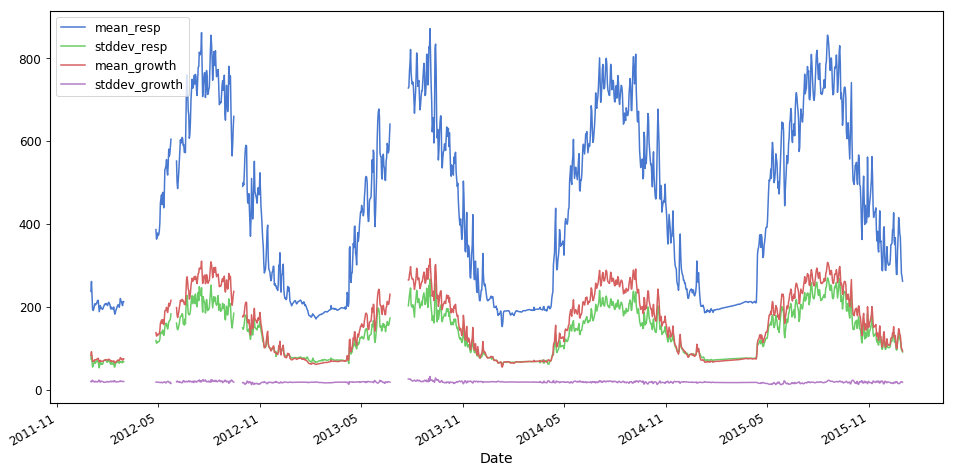

In [92]:
# Read in measured respiration and growth in plots
obs_growth_ctrl = pd.read_csv('data/Obs/Harvard_soil_fungal_growth_daily_control_O.csv', delim_whitespace=True)
obs_resp_ctrl   = pd.read_csv('data/Obs/Harvard_soil_Rh_daily_control_O.csv', delim_whitespace=True)
obs_growth_htd = pd.read_csv('data/Obs/Harvard_soil_fungal_growth_daily_heated_O.csv', delim_whitespace=True)
obs_resp_htd   = pd.read_csv('data/Obs/Harvard_soil_Rh_daily_heated_O.csv', delim_whitespace=True)

clean_measured_data(obs_growth_ctrl)
clean_measured_data(obs_resp_ctrl)
clean_measured_data(obs_growth_htd)
clean_measured_data(obs_resp_htd)

# Merge the cleaned DataFrames for easier handling later
observed_ctrl = pd.merge(obs_resp_ctrl, obs_growth_ctrl, left_index=True, right_index=True, suffixes=('_resp', '_growth'))
observed_htd = pd.merge(obs_resp_htd, obs_growth_htd, left_index=True, right_index=True, suffixes=('_resp', '_growth'))

# Plot the DataFrame to inspect the data
observed_ctrl.plot()

## Comments
* **Standard deviation is usually not plotted by itself, but 'surrounds' the values**
Yes, that is true. Plotting the data like this was a lazy decision from my side. The intention of the plot was just to inspect the data, for instance see how the respiration and growth relates to one another including their respective uncertainties. 

## Data processing

### Model processing

The model respiration and growth data has the unit kgC m$^{-2}$ day$^{-1}$ while the measurement data comes in the form og $\mu$C gSOC$^{-1}$ day$^{-1}$, to compare them we need to convert them to the same unit. To do this, we also need to have the size of the soil carbon pool from the model, which we read in earlier. As standard, the model outputs soil carbon content on a yearly timestep. We will use this value when calculating our flux rates, and assume that the soil carbon pool is fairly stable over the year.

### Observed data processing

The data from the measurements are easy to handle and do not need much processing. The only thing we need to do is to calculate the CUE.



In [93]:
# Modelled data
def convert(df, cpl):
    #Cpool from kgC m-2 to gC m-1
    cpl['SoilC'] *= 1000
    
    for row in cpl.itertuples():
        # Convert from kgC m-2 day-1 to ugC gSOC -1 day-1
        df.loc[df.index.year == row[3], 'Resp'] = df.loc[df.index.year == row[3], 'Resp'].apply(lambda x: x  * 1e9 / row[6] ) 
        df.loc[df.index.year == row[3], 'Growth'] = df.loc[df.index.year == row[3], 'Growth'].apply(lambda x: x * 1e9 / row[6] )  

        
# Iterate over the DataFrames in the dictionaries 
for key, dataframe in modelled.items():
    convert(modelled[key], cpool[key])

    
# It is a bit redundant to merge the observed and modelled DataFrames and create a new
# dictionary, but it makes for easier plotting of scatterplots later.
scatter = {
    'trunk': pd.merge(modelled['trunk'], observed_ctrl, how='inner', left_index=True, right_index=True), 
    'trunk ctrl': pd.merge(modelled['trunk ctrl'], observed_ctrl, how='inner', left_index=True, right_index=True),
    'trunk htd': pd.merge(modelled['trunk htd'], observed_htd, how='inner', left_index=True, right_index=True),
    'flex': pd.merge(modelled['flex'], observed_ctrl, how='inner', left_index=True, right_index=True), 
    'flex ctrl': pd.merge(modelled['flex ctrl'], observed_ctrl, how='inner', left_index=True, right_index=True), 
    'flex htd': pd.merge(modelled['flex htd'], observed_htd, how='inner', left_index=True, right_index=True)
}

# Observed data
observed_ctrl['CUE'] = observed_ctrl['mean_growth'] / (observed_ctrl['mean_growth'] + observed_ctrl['mean_resp'])
observed_htd['CUE'] = observed_htd['mean_growth'] / (observed_htd['mean_growth'] + observed_htd['mean_resp'])

scatter['flex'].head()

,WcontU,WcontL,SoilT,Resp,Growth,mean_resp,stddev_resp,mean_growth,stddev_growth
Date,,,,,,,,,
2012-01-01,0.8483,0.9819,1.278,19.877676,35.932722,236.914830,73.799677,83.016738,19.522876
2012-01-02,0.8386,0.9819,1.181,18.348624,34.403670,260.874153,83.425350,91.296645,18.225950
2012-01-03,0.8291,0.9819,1.084,17.584098,32.874618,224.865178,66.473445,79.126880,21.444327
2012-01-04,0.8199,0.9819,0.988,16.055046,31.345566,193.937582,54.207306,68.801850,22.415378
2012-01-05,0.8109,0.9819,0.892,15.290520,29.816514,190.874540,57.350674,67.232237,20.551517


## Plotting

It has become time for plotting our variables.

In [94]:
def plot_comparison(obsvar, obserr, modvar, xy_range, timeylabel, xlabel, ylabel, filename):
    """
    Function for plotting the comparion plot. Can be used for both growth and respiration.
    Since both the observed and modelled DataFrames are global, we do not need to give them
    as inputs to the function.
    """
    def get_one_to_one(axis):
        """
        Method for getting the one to one-line in a dataset
        """
        xmin, xmax = axis.get_xlim()
        ymin, ymax = axis.get_ylim()
        minimum = min([xmin, ymin])
        maximum = max([xmax, ymax])
        return Line2D([minimum, maximum], [minimum, maximum], color='k', linewidth=0.75, linestyle='--')
    
    def get_regression_line(df, obs_var, mod_var, color='k'):
        """
        Takes in a dataframe, and a variable and calculates the regression line for the data.

        Returns:
            coordinate pair for upper and lower points on regression line
        """
        df1 = df.dropna(axis=0, how='any')
        ext = 75 # How much to extend the Line outside of the max and min data points

        slope, intercept, r_value, p_value, std_err = stats.linregress(df1[obs_var], df1[mod_var])
        xmin = np.min(df[obs_var]) - ext
        xmax = np.max(df[obs_var]) + ext
        ymin = np.min(df[mod_var]) - ext
        ymax = np.min(df[mod_var]) + ext
        return Line2D([xmin, xmax], [slope * xmin + intercept, slope * xmax + intercept], color=color, linewidth=1, linestyle='-',
                        label='{0:.2f}x + {0:.2f}'.format(slope, intercept))
    
    # Set up figure
    plt.figure(figsize=(12,8))

    # Set up grid and subplots
    ax1 = plt.subplot2grid((2,3), (0,0), colspan=3)
    ax2 = plt.subplot2grid((2,3), (1,0))
    ax3 = plt.subplot2grid((2,3), (1,1))
    ax4 = plt.subplot2grid((2,3), (1,2))

    # Plot data from dataframes
    modelled['trunk ctrl'][modvar].plot(ax=ax1, c='k', linestyle='-', label='Trunk - control')
    modelled['trunk htd'][modvar].plot(ax=ax1, c='y', linestyle='-', label = 'Trunk - heated')
    modelled['flex ctrl'][modvar].plot(ax=ax1, c='b', linestyle='-', label='Flex - control')
    modelled['flex htd'][modvar].plot(ax=ax1, c='r', linestyle='-', label='Flex - heated')

    observed_ctrl[obsvar].plot(ax=ax1, c='b', linestyle=':', linewidth=1, label='Control')
    observed_htd[obsvar].plot(ax=ax1, c='r', linestyle=':', linewidth=1, label='Heated')
    ax1.legend(loc='center right')
    ax1.fill_between(observed_ctrl.index, observed_ctrl[obsvar]-observed_ctrl[obserr], observed_ctrl[obsvar]+observed_ctrl[obserr], color='b', alpha=.15)
    ax1.fill_between(observed_htd.index, observed_htd[obsvar]-observed_htd[obserr], observed_htd[obsvar]+observed_htd[obserr], color='r', alpha=.15)

    scatter['trunk'].plot.scatter(ax=ax2, x=obsvar, y=modvar, c='g', label='Trunk')
    scatter['flex'].plot.scatter(ax=ax2, x=obsvar, y=modvar, c='y', label='Flex')

    scatter['trunk ctrl'].plot.scatter(ax=ax3, x=obsvar, y=modvar, c='g', label='Trunk')
    scatter['flex ctrl'].plot.scatter(ax=ax3, x=obsvar, y=modvar, c='y', label='Flex')

    scatter['trunk htd'].plot.scatter(ax=ax4, x=obsvar, y=modvar, c='g', label='Trunk')
    scatter['flex htd'].plot.scatter(ax=ax4, x=obsvar, y=modvar, c='y', label='Flex')

    ax2.set_xlim(xy_range)
    ax2.set_ylim(xy_range)
    ax3.set_xlim(xy_range)
    ax3.set_ylim(xy_range)
    ax4.set_xlim(xy_range)
    ax4.set_ylim(xy_range)

    ax2.add_line(get_one_to_one(ax2))
    ax2.add_line(get_regression_line(scatter['trunk'], obsvar, modvar, 'g'))
    ax2.add_line(get_regression_line(scatter['flex'], obsvar, modvar, 'y'))
    ax3.add_line(get_one_to_one(ax3))
    ax3.add_line(get_regression_line(scatter['trunk ctrl'], obsvar, modvar, 'g'))
    ax3.add_line(get_regression_line(scatter['flex ctrl'], obsvar, modvar, 'y'))
    ax4.add_line(get_one_to_one(ax3))
    ax4.add_line(get_regression_line(scatter['trunk htd'], obsvar, modvar, 'g'))
    ax4.add_line(get_regression_line(scatter['flex htd'], obsvar, modvar, 'y'))

    ax2.set_title('Modelled', fontsize=12)
    ax3.set_title('Control', fontsize=12)
    ax4.set_title('Heated', fontsize=12)
    ax1.set_xlabel('')
    ax2.set_xlabel(xlabel)
    ax3.set_xlabel(xlabel)
    ax4.set_xlabel(xlabel)
    ax1.set_ylabel(timeylabel)
    ax2.set_ylabel(ylabel)
    ax3.set_ylabel('')
    ax4.set_ylabel('')

    ax2.legend(ncol=2, loc='upper left', scatterpoints=1)
    ax3.legend(ncol=2, loc='upper left', scatterpoints=1)
    ax4.legend(ncol=2, loc='upper left', scatterpoints=1)

    plt.tight_layout()
    plt.show()
    plt.savefig('plots/{}'.format(filename))

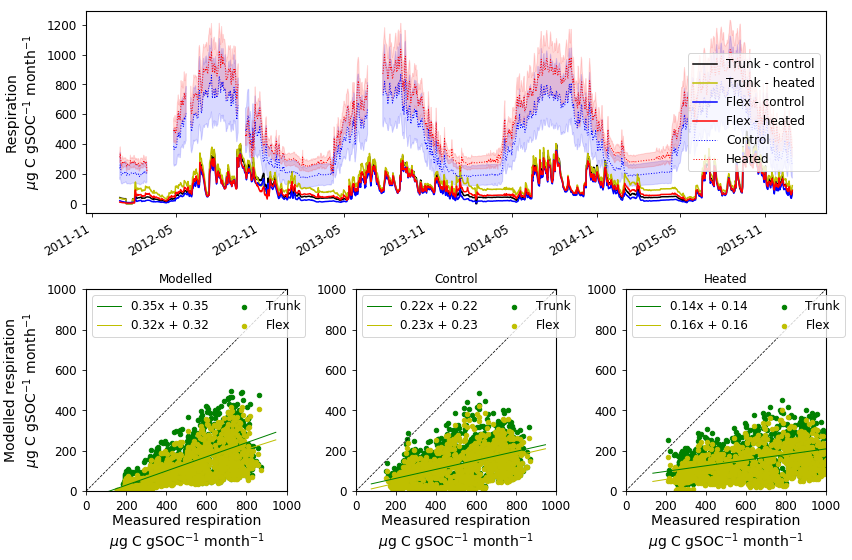

In [95]:
# Plot the respiration bias from the model
plot_comparison('mean_resp', 'stddev_resp', 'Resp',
                [0, 1000],
                'Respiration\n$\mu$g C gSOC$^{-1}$ month$^{-1}$',
                'Measured respiration\n$\mu$g C gSOC$^{-1}$ month$^{-1}$',
                'Modelled respiration\n$\mu$g C gSOC$^{-1}$ month$^{-1}$',
                'respiration_bias.png')

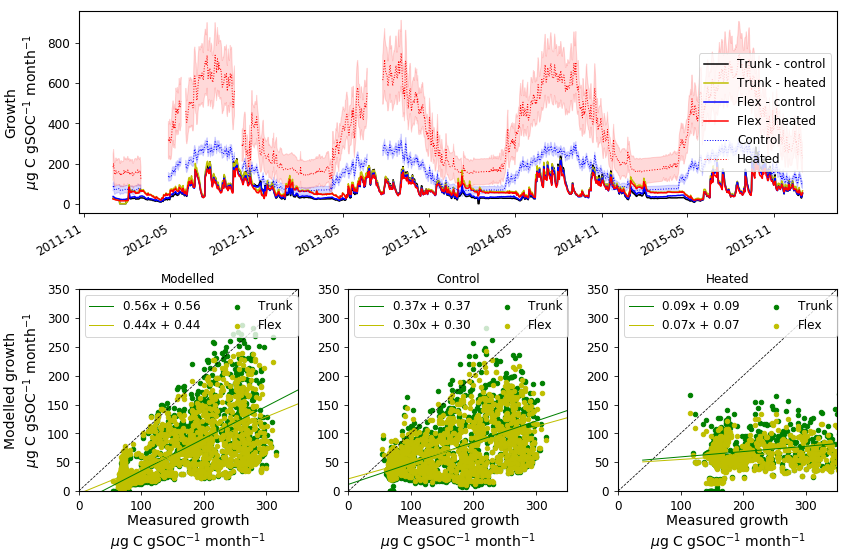

In [96]:
# plot the growth bias from the model
plot_comparison('mean_growth', 'stddev_growth', 'Growth',
                [0, 350],
                'Growth\n$\mu$g C gSOC$^{-1}$ month$^{-1}$',
                'Measured growth\n$\mu$g C gSOC$^{-1}$ month$^{-1}$', 
                'Modelled growth\n$\mu$g C gSOC$^{-1}$ month$^{-1}$',
                'growth_bias.png')

## Comments
* **The regressions do not match the plotted lines due to an error in the plotting methods**
True, typo corrected, thanks!

## Reflection time

Two things are striking with the above two plots. First of all we see that the model in general follows the seasonal pattern of the measured respiration and growth data, but is consistently to low. This is also seen in the scatter plots, where the regression-line indicated that the slope is much too flat, and that almost all scatterpoints fall below the one-to-one line. Although the flat curve could indicate a model bias, this is not a general bias but rather a factor difference. The erroneous factor in this case is probably the soil carbon pool. In order to obtain the same unit from the model data as the measured data, we had to divide our fluxes with the soil carbon pool. If this pool is too high we will get lower values than measured. To get around this problem we could normalise the respiration and growth to the mean of each simulation.

The second problem is that we see clear dips in both respiration and growth during summers (e.g., around august-october 2014), which is not seen in the measured data. Looking back at Eqn 1, decomposition rate in the model is not only determined by temperature but also by soil moisture. The measurement data we use in this study is only an estimate of $f(T)$. To test this, we could simply plot soil moisture in the top layer (which is the soil moisture content that is used for $f(\Theta)$), and for instance respiration. Then we compare the timings of respiration dips with low soil moisture contents. 

Normally, these kind of inferences are not to be recommended. However, when it comes to the model decomposition, there are no other factors that could influence the decomposition rates so directly. Thus, it is a reasonable approach.


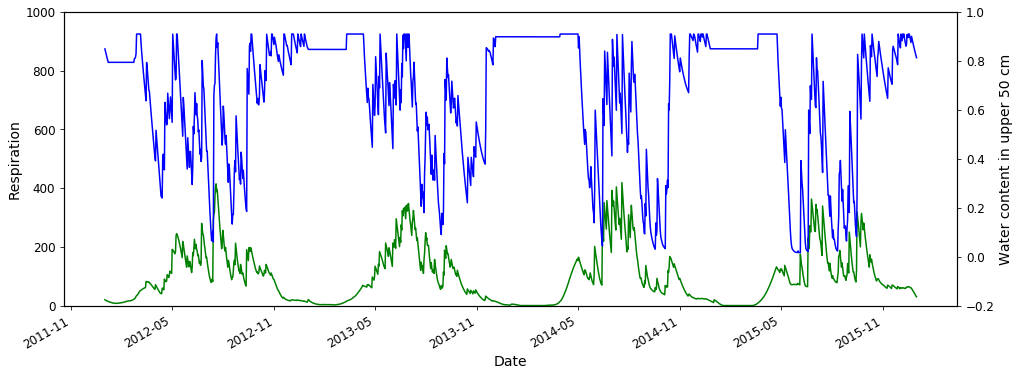

In [36]:
# Plot water content and respiration
plt.figure(figsize=(16,6))
plt.style.use('seaborn-muted')
ax = modelled['flex']['Resp'].plot(color='g')
ax2 = modelled['flex']['WcontU'].plot(secondary_y=True, color='b')
ax.set_ylim([0, 1000])
ax.set_ylabel('Respiration')
ax2.set_ylim([-.2, 1]) # -.2 valeus does not exist, but makes the plot a bit less messy
ax2.set_ylabel('Water content in upper 50 cm')
plt.show()

The timing of lower water content in the soil is very well correlated with the timing of the respiration decrease. This means that the decomposition in these cases is not limited by temperature, but by moisture. This is as it should be and is an effect that is not accounted for in the measurement data. Thus we need not worry about the dips in the model respiration and growth data over the whole season.

#### Relative incerase
Onwards to the larger difficulties. We simply divide the daily respiration for each treatment with the mean respiration for the whole period of 2012-2015. This way we could get rid of the dependence on the C-pool. The resulting quotient is thus unitless.


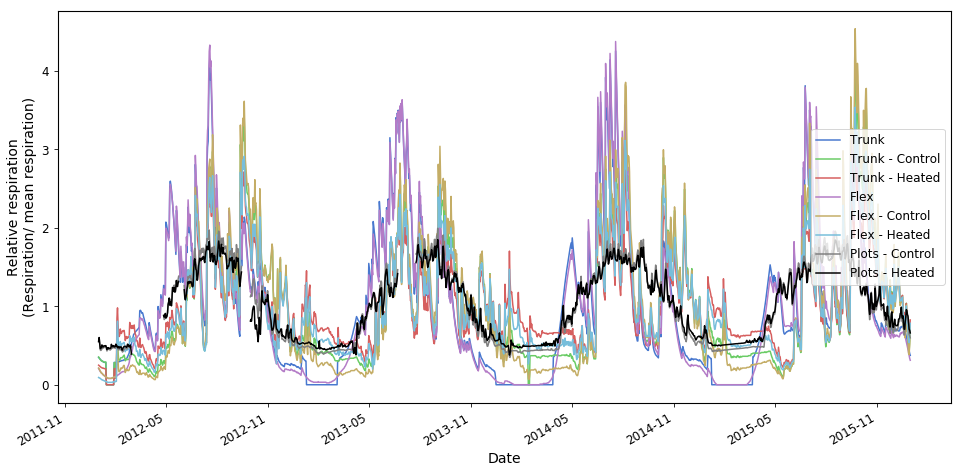

In [86]:
# Normalised respiration
trunk_rel = modelled['trunk'][['Resp', 'Growth']] / modelled['trunk'][['Resp', 'Growth']].mean()
trunk_ctrl_rel = modelled['trunk ctrl'][['Resp', 'Growth']] / modelled['trunk ctrl'][['Resp', 'Growth']].mean()
trunk_htd_rel = modelled['trunk htd'][['Resp', 'Growth']] / modelled['trunk htd'][['Resp', 'Growth']].mean()
flex_rel = modelled['flex'][['Resp', 'Growth']] / modelled['flex'][['Resp', 'Growth']].mean()
flex_ctrl_rel = modelled['flex ctrl'][['Resp', 'Growth']] / modelled['flex ctrl'][['Resp', 'Growth']].mean()
flex_htd_rel = modelled['flex htd'][['Resp', 'Growth']] / modelled['flex htd'][['Resp', 'Growth']].mean()

obs_ctrl_rel = observed_ctrl[['mean_resp', 'mean_growth']] / observed_ctrl[['mean_resp', 'mean_growth']].mean()
obs_htd_rel = observed_htd[['mean_resp', 'mean_growth']] / observed_htd[['mean_resp', 'mean_growth']].mean()

plt.figure(figsize=(16,8))
trunk_rel['Resp'].plot(label='Trunk')
trunk_ctrl_rel['Resp'].plot(label='Trunk - Control')
trunk_htd_rel['Resp'].plot(label='Trunk - Heated')
flex_rel['Resp'].plot(label='Flex')
flex_ctrl_rel['Resp'].plot(label='Flex - Control')
flex_htd_rel['Resp'].plot(label='Flex - Heated')
obs_ctrl_rel['mean_resp'].plot(label='Plots - Control', c='gray')
obs_htd_rel['mean_resp'].plot(label='Plots - Heated', c='k')
plt.ylabel('Relative respiration\n(Respiration/ mean respiration)')
plt.legend(loc='center right')
plt.show()

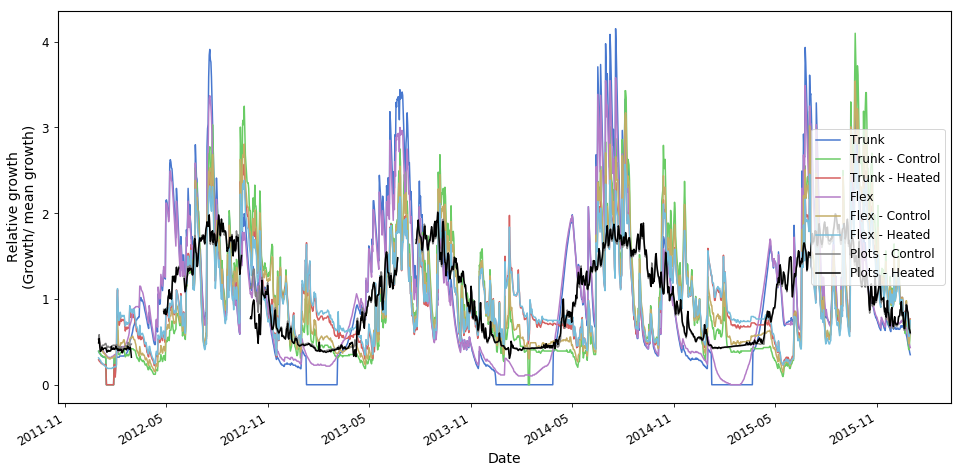

In [85]:
# Relative increase in growth

plt.figure(figsize=(16,8))
trunk_rel['Growth'].plot(label='Trunk')
trunk_ctrl_rel['Growth'].plot(label='Trunk - Control')
trunk_htd_rel['Growth'].plot(label='Trunk - Heated')
flex_rel['Growth'].plot(label='Flex')
flex_ctrl_rel['Growth'].plot(label='Flex - Control')
flex_htd_rel['Growth'].plot(label='Flex - Heated')
obs_ctrl_rel['mean_growth'].plot(label='Plots - Control', c='gray')
obs_htd_rel['mean_growth'].plot(label='Plots - Heated', c='k')
plt.ylabel('Relative growth\n(Growth/ mean growth)')
plt.legend(loc='center right')
plt.show()

## Comments
* **These plots are cluttery and the different series are hard to distinguish**
Very much true! The intent of the plots was to show the improvment in the seasonality. However, after this comment I also realised that it is very hard to see if any of the simulations are better than another. In a subsequent plot I have divided trunk and flex into subplots along with a third subplot with the difference between the two. This makes the plot easier to interpret. Thanks!


* **Some of the legends hide some of the data**
Yes, they do and ideally they should be placed outside of the plot. I guess I was a bit lazy here as well. The intent of the plots was as stated above to outline the general seasonality, so all datapoints are not really relevant to show. If the plots were to be published, the legend would have to be outside the figure. Good comment!


This looks much better! Although the amplitude is sometimes too high (especially in early summer), the overall seasonality looks good for both repiration and growth.

#### CUE
Finally, we will look at the CUE for the modelled and observed data. The measured CUE has been calculated above, and we will do the same for the model simulations.

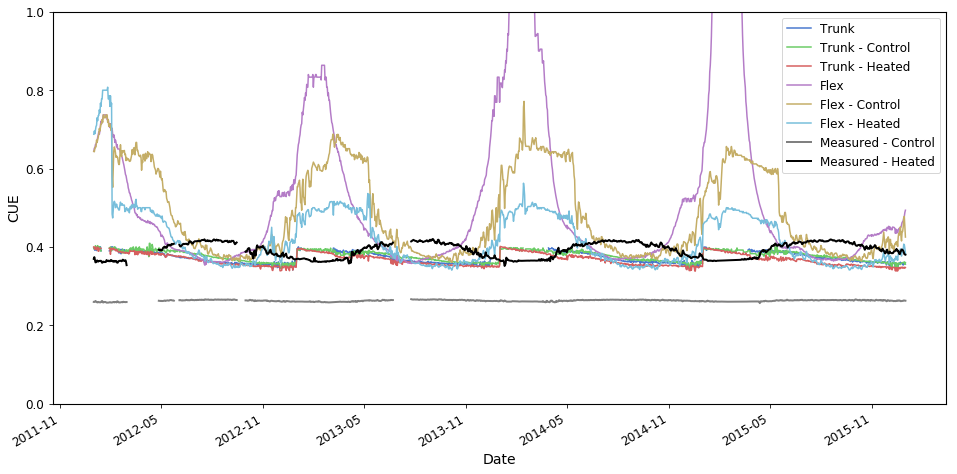

In [102]:
# CUE
trunk_CUE = modelled['trunk']['Growth'] / (modelled['trunk']['Growth'] + modelled['trunk']['Resp'])
trunk_ctrl_CUE = modelled['trunk ctrl']['Growth'] / (modelled['trunk ctrl']['Growth'] + modelled['trunk ctrl']['Resp'])
trunk_htd_CUE = modelled['trunk htd']['Growth'] / (modelled['trunk htd']['Growth'] + modelled['trunk htd']['Resp'])

flex_CUE = modelled['flex']['Growth'] / (modelled['flex']['Growth'] + modelled['flex']['Resp'])
flex_ctrl_CUE = modelled['flex ctrl']['Growth'] / (modelled['flex ctrl']['Growth'] + modelled['flex ctrl']['Resp'])
flex_htd_CUE = modelled['flex htd']['Growth'] / (modelled['flex htd']['Growth'] + modelled['flex htd']['Resp'])

plt.figure(figsize=(16,8))
trunk_CUE.plot(label='Trunk')
trunk_ctrl_CUE.plot(label='Trunk - Control')
trunk_htd_CUE.plot(label='Trunk - Heated')
flex_CUE.plot(label='Flex')
flex_ctrl_CUE.plot(label='Flex - Control')
flex_htd_CUE.plot(label='Flex - Heated')

observed_ctrl['CUE'].plot(label='Measured - Control', linewidth=2, color='gray')
observed_htd['CUE'].plot(label='Measured - Heated', linewidth=2, c='k')

plt.ylabel('CUE')
plt.ylim(0, 1) # CUE is a fraction between 0 and 1
plt.legend()
plt.show()

This does not look at all like the measurement data, which have a seasonality where the CUE is largest in mid summer. LPJ-GUESS on the other hand simulates a much larger CUE in winter. To find the reason for this, we need to go back to Fig 1. The difference between the respiration and growth curves is largest at low temperatures. At 0°C the respiration is almost 0 as well, while the growth is still positive. This will result in a higher CUE at lower temperatures. When forced with measured soil temperatures the model CUE improves compared to the measured, although they are still overestimated.

Another likely cause of the errors seen in modelled CUE is a large C input at the first day of each year. Within the model, carbon from dead trees, branches and other biomass is reallocated on the last day of each year. Thus there is a jump in the soil carbon pools on the 1st January each year. Since the decomposition rate depends on the size of the SOM pool, there is a jump in decomposition at this time as long as $f(T)$ is not 0. This corresponds to temperatures of approximately -10°C (Fig 1), which are very rare in this gridcell (Fig 2 and Fig 3). Similarly, soils are often moist in winter, so $f(\Theta)$ will also not be 0. 

The values used for the CUE calculations are a product of the annual soil carbon pool. Thus, if the model output-module were rewritten to output daily C-pool values instead of only annual, the daily C-pool values could be used in the analysis instead, and thus some of the odd patterns in the above figure could be avoided. These changes and reruns of the model require more time than is possible in the scope of this course, and thus the analysis here will have to stop with this statement.

## Conclusion
The model seems to capture the seasonality of respiration and growth fairly well. Although representing observed patterns of microbial respiration and growth, the model seem to become more sensitive to soil temperatures with the new features. The seasonality of the modelled CUE is also sensitive to other implementations within the models (i.e., ecosystem carbon allocation), which might need to be dealt with if these features were to be a standard part of LPJ-GUESS.


### References
Contosta, A. R., S. D. Frey, and A. B. Cooper. 2011. Seasonal dynamics of soil respiration and N mineralization in chronically warmed and fertilized soils. Ecosphere 2(3):art36. doi:10.1890/ES10-00133.1

Smith, B., D. Wårlind, A. Arneth, T. Hickler, P. Leadley, J. Siltberg, and S. Zaehle, 2014.Implications of incorporating N cycling and N limitations on primary production in an individual-based dynamic vegetation model
Biogeosciences, 11, 2027–2054. doi:10.5194/bg-11-2027-2014